# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [34]:
# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [36]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [38]:
# 🔧 Basic functions
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [40]:
open_data(websites)

Data shape is (1781, 21).

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Data row sample and full columns:


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1338,B0_79,68,11,UTF-8,nginx,NaN,US,Arizona,26/01/2006 21:09,11/04/2017 23:16,48,0,3,4896,52,58,73318,5200,52,4.0,0
868,B0_2009,49,11,UTF-8,Apache,NaN,NaN,NaN,NaN,NaN,25,6,11,1662,25,12,799,1662,25,0.0,0
139,B0_2266,29,8,UTF-8,Apache/2.4.25,6813.0,US,Texas,23/05/2006 0:00,13/07/2016 0:00,17,9,10,1249,17,15,1062,1249,17,0.0,0
303,B0_717,35,7,UTF-8,GSE,8813.0,US,CA,31/07/2000 0:00,29/06/2016 0:00,41,6,4,4769,45,42,69898,5119,45,4.0,0
500,B0_915,39,9,ISO-8859-1,nginx/1.12.0,NaN,CA,SK,19/10/2005 0:00,18/10/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


In [ ]:
# Se trata de un dataframe con 1781 filas y 21 columnas

In [28]:
# Hay dos tipos de datos: numéricos (enteros y decimales) y objetos (texto).
# En cuanto a la target, como primera aproximación sugerimos que la columna donde se ve si la url es maligna o no es la de 'Type'.
# En cuanto a las columnas que son object

In [16]:
# Hacemos una copia y empezamos a explorar el dataframe
df = websites.copy()

In [44]:
# Una vez tenemos la copia, homogeneizamos y chequeamos el estado del dataframe
snake_columns(df)
df

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


In [46]:
# A continuación, revisamos duplicados, Nans y espacios en blanco:
explore_data(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
url,0,0
url_length,0,0
number_special_characters,0,0
charset,7,0
server,176,0
content_length,812,0
whois_country,306,0
whois_statepro,362,0
whois_regdate,127,0
whois_updated_date,139,0


In [ ]:
# Podemos ver que las columnas con valores nulos son las categóricas (texto).

In [22]:
# Exploramos los valores unicos de cada categoría:
df.nunique().sort_values(ascending=False)

URL                          1781
WHOIS_REGDATE                 890
SOURCE_APP_BYTES              885
APP_BYTES                     825
REMOTE_APP_BYTES              822
CONTENT_LENGTH                637
WHOIS_UPDATED_DATE            593
SERVER                        238
WHOIS_STATEPRO                181
URL_LENGTH                    142
REMOTE_APP_PACKETS            116
APP_PACKETS                   113
SOURCE_APP_PACKETS            113
TCP_CONVERSATION_EXCHANGE     103
DIST_REMOTE_TCP_PORT           66
WHOIS_COUNTRY                  48
NUMBER_SPECIAL_CHARACTERS      31
REMOTE_IPS                     18
DNS_QUERY_TIMES                10
CHARSET                         8
Type                            2
dtype: int64

In [30]:
# Como podemos ver, 'type' tiene unicamente dos valores unicos. Seguimos explorando:
df.Type.unique()

array([1, 0])

In [32]:
# Vemos que son booleanos, por lo que determinamos que es esta columna la que determinará si la URL es maliciosa o no.
# Seguimos explorando:
df.Type.value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [ ]:
# Vemos que hay muchos más 0s que 1s, lo que sugiere que los 0 se utilicen para determinar que la URL no es maligna (False)
# Mientras que los 1s indicaran que la URL es maliciosa (True)

In [48]:
# Sacamos las estadísticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
url_length,1781.0,56.961258,27.555586,16.0,39.0,49.0,68.0,249.0
number_special_characters,1781.0,11.111735,4.549896,5.0,8.0,10.0,13.0,43.0
content_length,969.0,11726.927761,36391.809051,0.0,324.0,1853.0,11323.0,649263.0
tcp_conversation_exchange,1781.0,16.261089,40.500975,0.0,0.0,7.0,22.0,1194.0
dist_remote_tcp_port,1781.0,5.472768,21.807327,0.0,0.0,0.0,5.0,708.0
remote_ips,1781.0,3.060640,3.386975,0.0,0.0,2.0,5.0,17.0
app_bytes,1781.0,2982.339135,56050.574748,0.0,0.0,672.0,2328.0,2362906.0
source_app_packets,1781.0,18.540146,41.627173,0.0,0.0,8.0,26.0,1198.0
remote_app_packets,1781.0,18.746210,46.397969,0.0,0.0,9.0,25.0,1284.0
source_app_bytes,1781.0,15892.545761,69861.929888,0.0,0.0,579.0,9806.0,2060012.0


In [ ]:
# En este caso no podemos obtener mucha información de la estadísitca descriptiva

<Axes: xlabel='type', ylabel='count'>

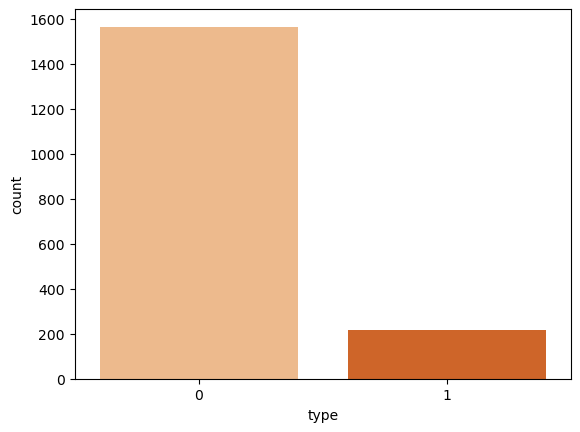

In [50]:
sns.countplot(data=df, x="type", palette="Oranges")

In [ ]:
# Los datos están muy desbalanceados. Más adelante exploraremos cómo solucionar esto.

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [60]:
# Para poder hacer la matriz de correlación unicamente con las columnas numéricas, definimos estas columnas:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")
round(num.corrwith(num["type"]).sort_values(ascending=False),2)

type                         1.00
number_special_characters    0.28
url_length                   0.16
dns_query_times              0.07
remote_app_bytes            -0.01
app_bytes                   -0.01
remote_app_packets          -0.03
source_app_packets          -0.03
app_packets                 -0.03
tcp_conversation_exchange   -0.04
source_app_bytes            -0.04
remote_ips                  -0.08
dist_remote_tcp_port        -0.08
content_length              -0.09
dtype: float64

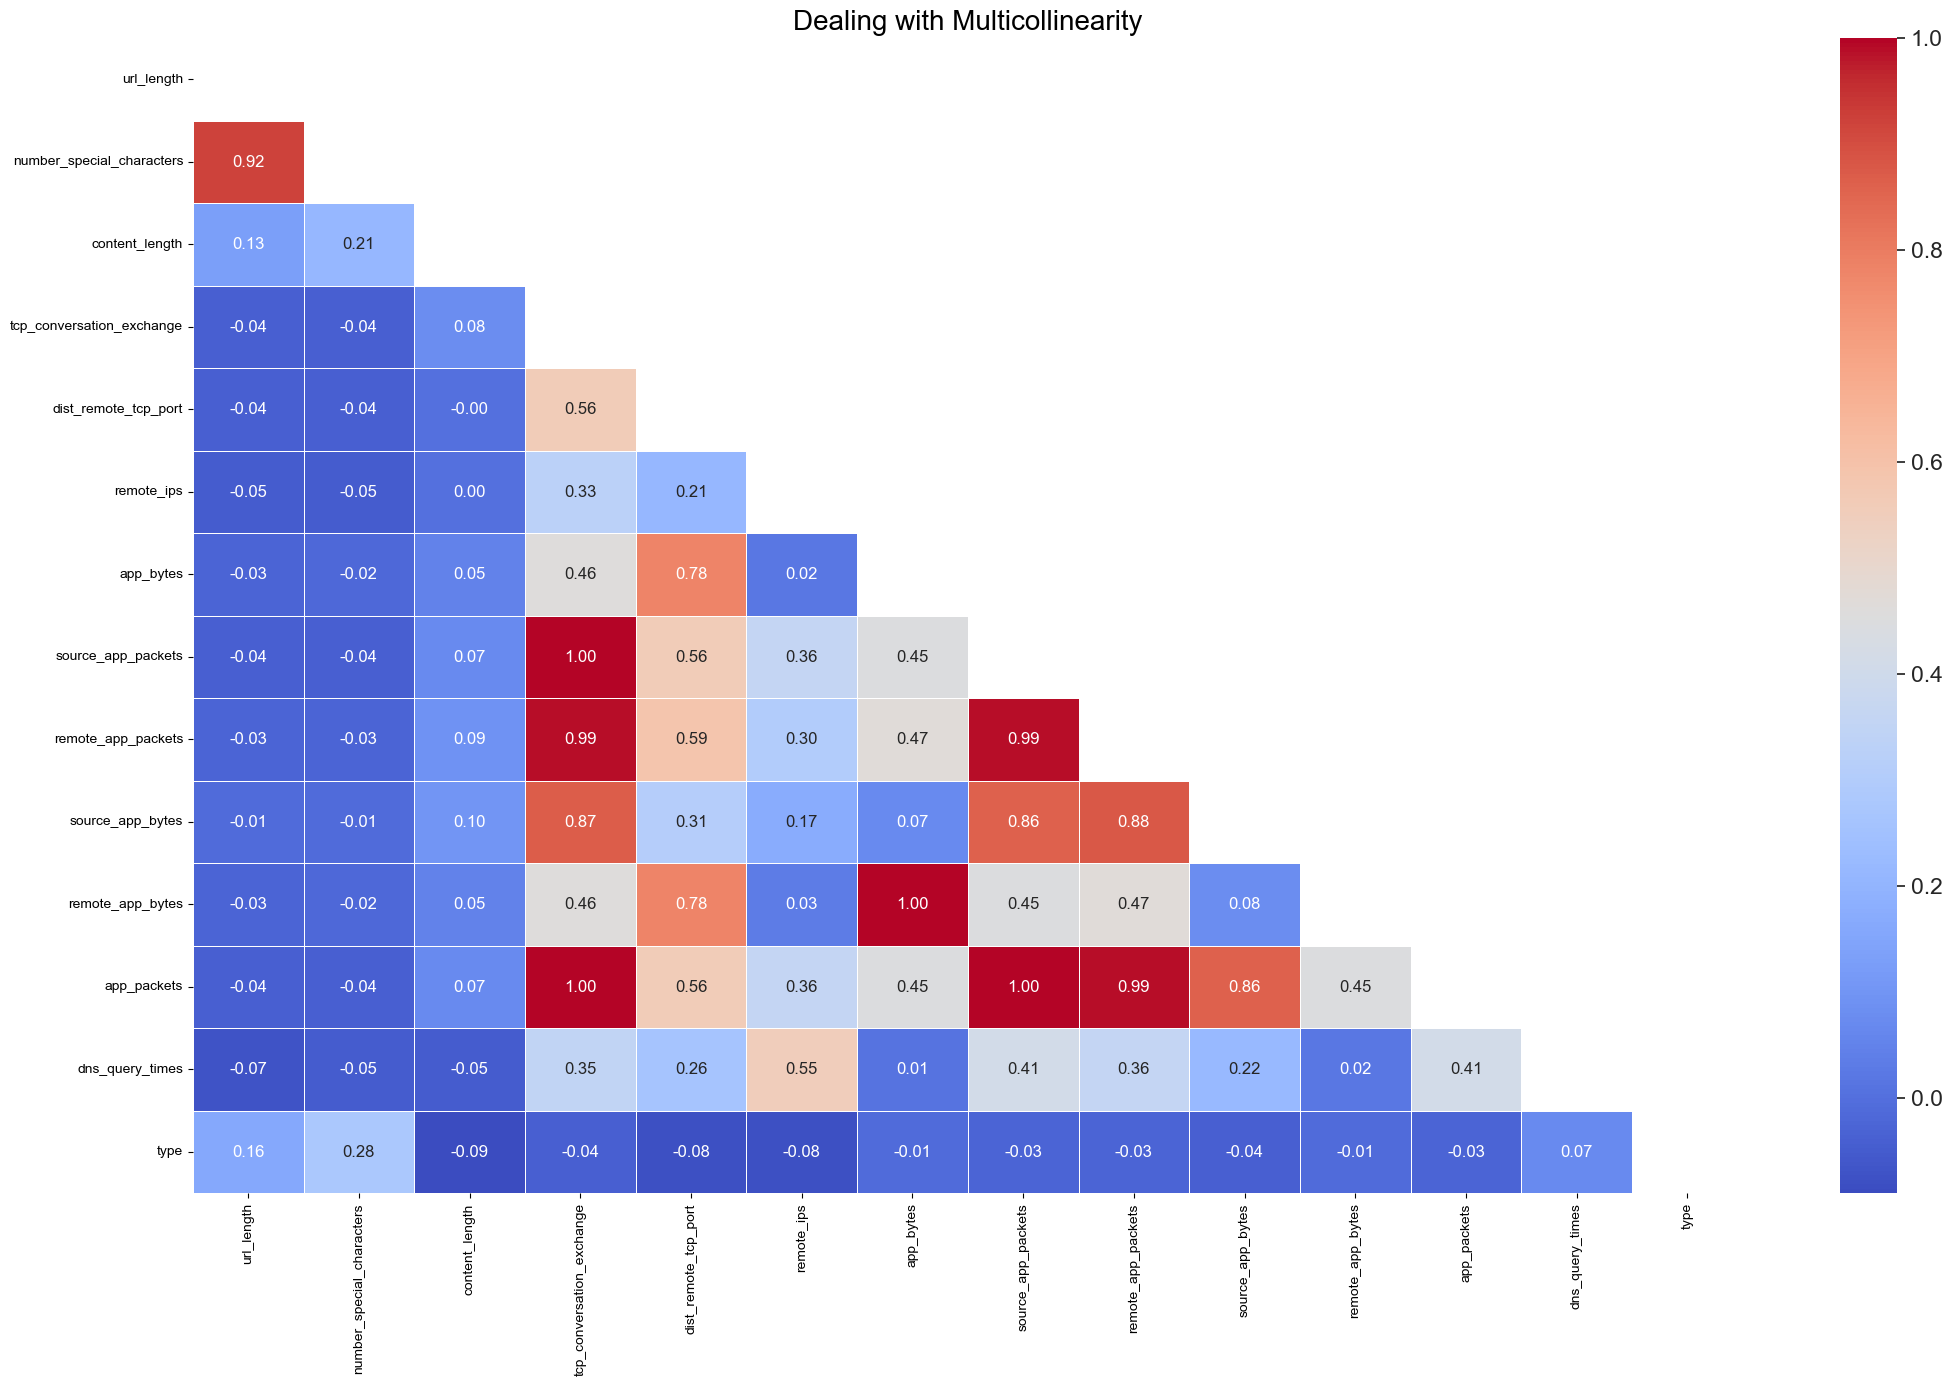

In [66]:
num_corr = num.corr().round(2)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Chequear Multicolinearidad", fontsize=20) 
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [68]:
num.columns

Index(['url_length', 'number_special_characters', 'content_length',
       'tcp_conversation_exchange', 'dist_remote_tcp_port', 'remote_ips',
       'app_bytes', 'source_app_packets', 'remote_app_packets',
       'source_app_bytes', 'remote_app_bytes', 'app_packets',
       'dns_query_times', 'type'],
      dtype='object')

In [72]:
# Como nos explica en el script, quitamos las tres columnas con más colinearidad.
# app_packets, tcp_conversation_exchange, app_bytes, source_app_packets
# Eliminando estas cuatro columnas eliminamos casi toda la multicolinearidad
num.drop(columns=['app_packets','tcp_conversation_exchange','app_bytes','source_app_packets'], inplace=True)

In [74]:
num

,url_length,number_special_characters,content_length,dist_remote_tcp_port,remote_ips,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type
0,16,7,263.0,0,2,10,1153,832,2.0,1
1,16,6,15087.0,7,4,19,1265,1230,0.0,0
2,16,6,324.0,0,0,0,0,0,0.0,0
3,17,6,162.0,22,3,37,18784,4380,8.0,0
4,17,6,124140.0,2,5,62,129889,4586,4.0,0
...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,3,186,0,0.0,1
1777,198,17,NaN,0,0,2,124,0,0.0,1
1778,201,34,8904.0,2,6,89,132181,6945,4.0,0
1779,234,34,NaN,0,0,0,0,0,0.0,0


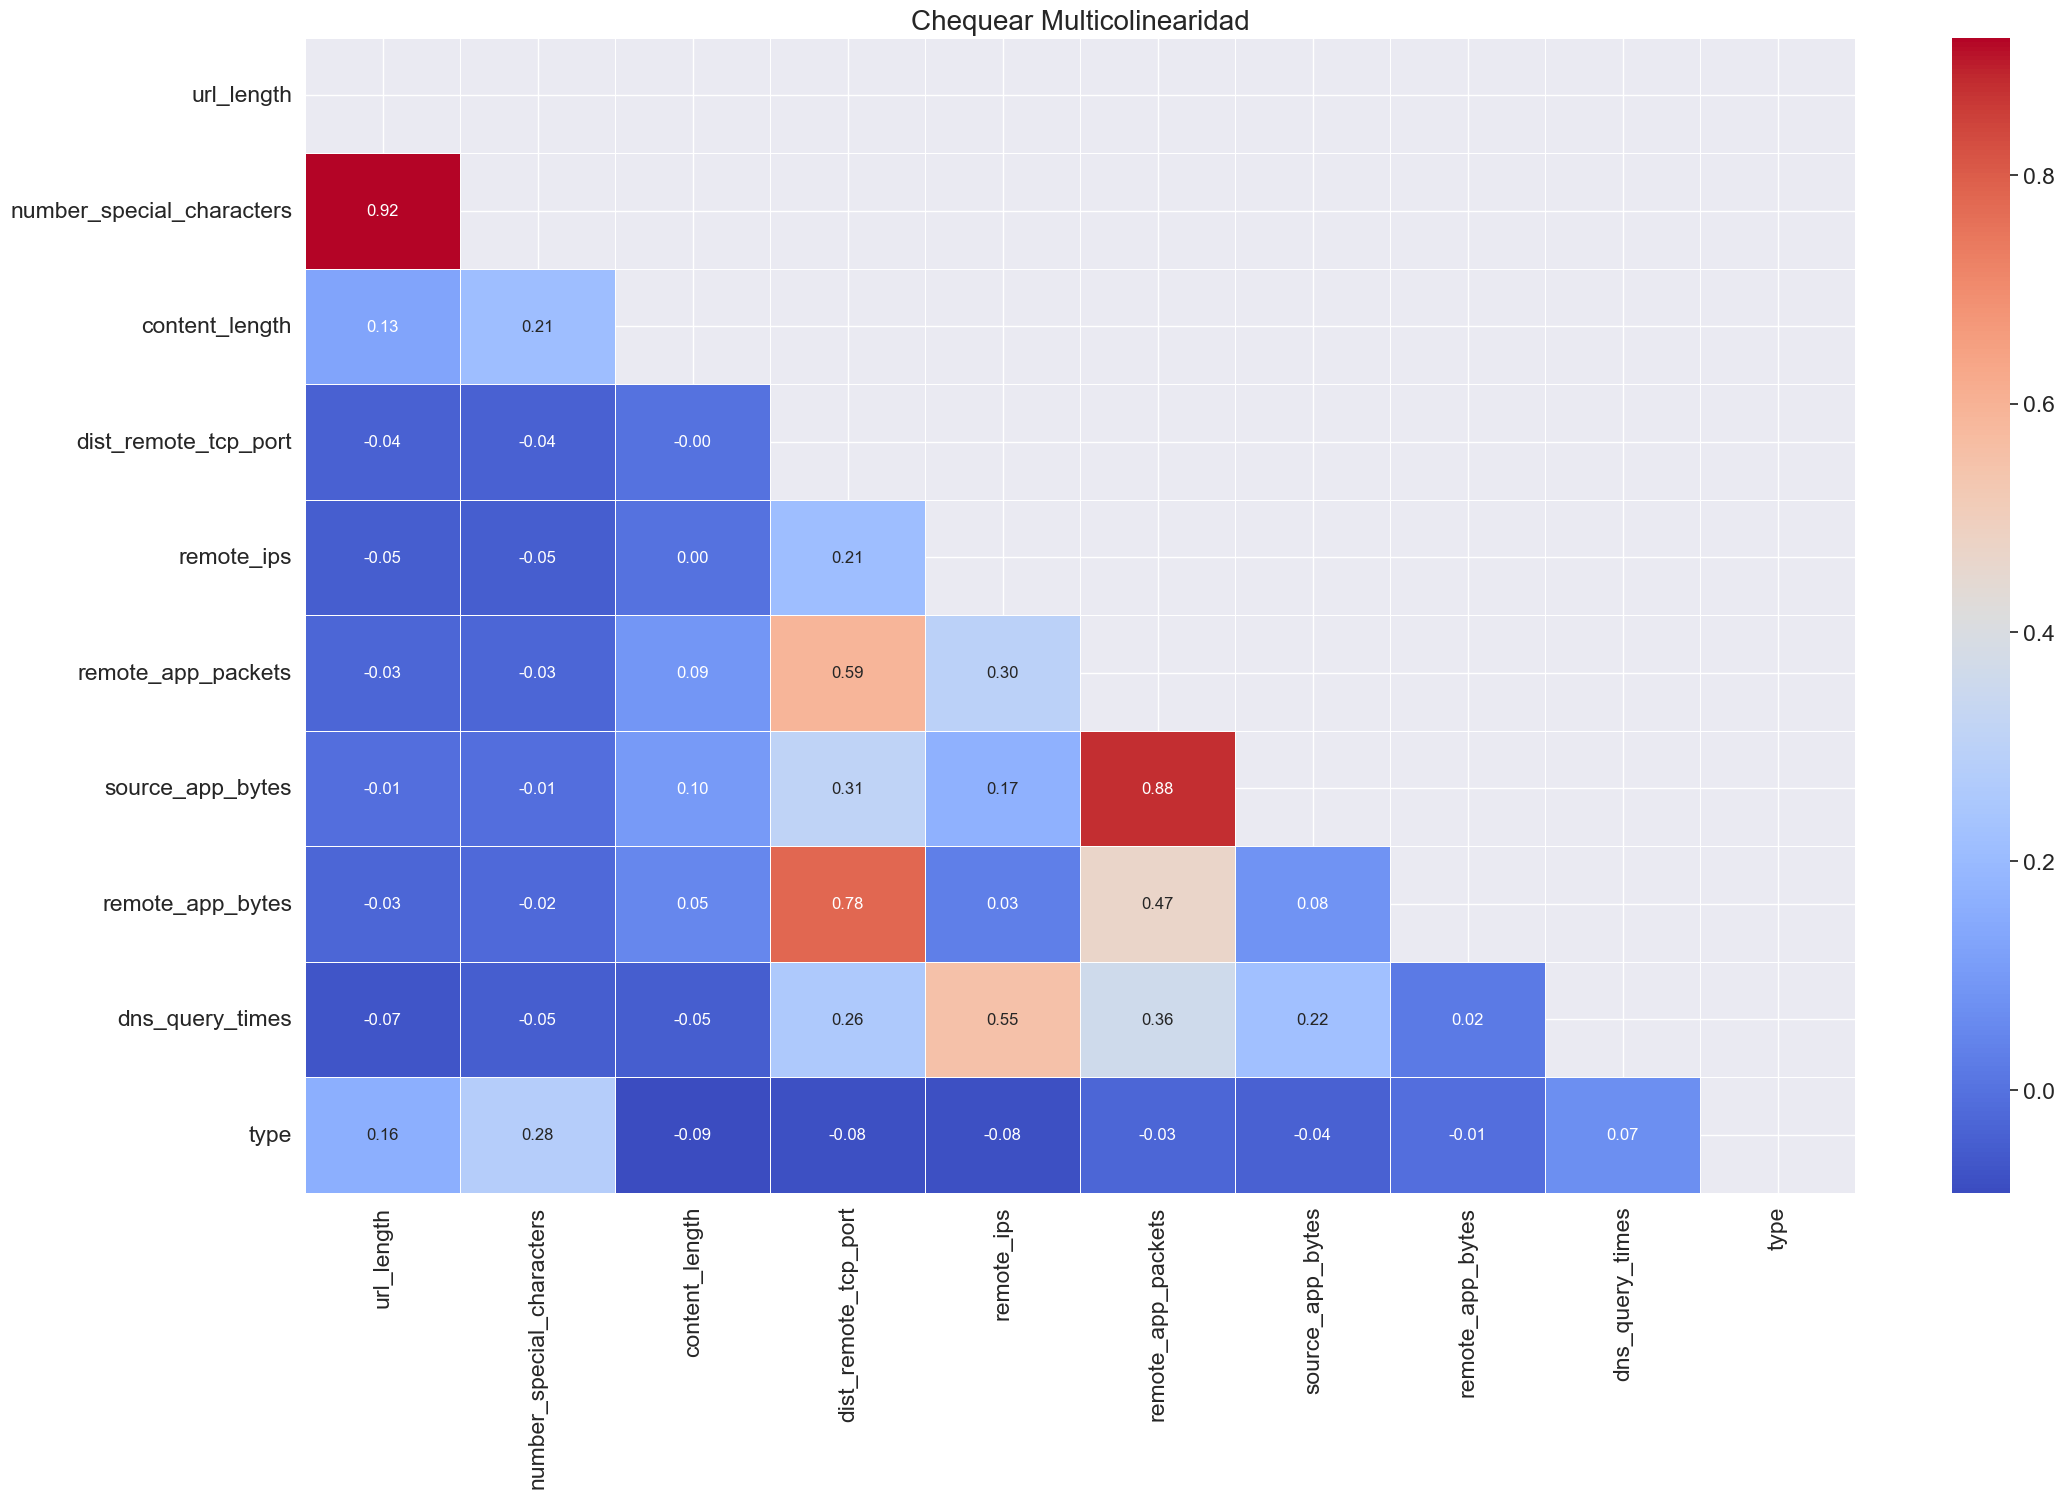

In [76]:
num_corr = num.corr().round(2)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Chequear Multicolinearidad", fontsize=20) 
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [78]:
explore_data(num)

There are 131 duplicate rows. Also;


,NaN,EmptySpaces
url_length,0,0
number_special_characters,0,0
content_length,812,0
dist_remote_tcp_port,0,0
remote_ips,0,0
remote_app_packets,0,0
source_app_bytes,0,0
remote_app_bytes,0,0
dns_query_times,1,0
type,0,0


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [80]:
# Eliminamos la columna de 'content_lenght' ya que tiene un gran porcentaje de valores nulos
num.drop(columns=['content_length'], inplace=True)

In [82]:
# En cuanot a la columna de 'dns_query_times', rellenamos el valor nulo con el metodo backfill
num['dns_query_times'].fillna(method='ffill', inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [84]:
# Examine missing values in each column
explore_data(num)

There are 345 duplicate rows. Also;


,NaN,EmptySpaces
url_length,0,0
number_special_characters,0,0
dist_remote_tcp_port,0,0
remote_ips,0,0
remote_app_packets,0,0
source_app_bytes,0,0
remote_app_bytes,0,0
dns_query_times,0,0
type,0,0


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [86]:
cat.columns

Index(['url', 'charset', 'server', 'whois_country', 'whois_statepro',
       'whois_regdate', 'whois_updated_date'],
      dtype='object')

In [88]:
cat['whois_country'].unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [90]:
# LO QUE TENGO : LO QUE QUIERO
country_mapping = {
    'nan': None,         # Valores nulos o faltantes
    'US': 'US',          # Estados Unidos
    'us': 'US',          # Estados Unidos (en minúsculas)
    'SC': 'SC',          # Seychelles
    'GB': 'UK',          # Reino Unido
    'UK': 'UK',          # Reino Unido (variación)
    "[u'GB'; u'UK']": 'UK',  # Reino Unido (otra variación)
    'United Kingdom': 'UK',  # Reino Unido (nombre completo)
    'RU': 'RU',          # Rusia
    'ru': 'RU',          # Rusia (en minúsculas)
    'AU': 'AU',          # Australia
    'CA': 'CA',          # Canadá
    'PA': 'PA',          # Panamá
    'se': 'SE',          # Suecia (en minúsculas)
    'SE': 'SE',          # Suecia
    'IN': 'IN',          # India
    'LU': 'LU',          # Luxemburgo
    'TH': 'TH',          # Tailandia
    'FR': 'FR',          # Francia
    'NL': 'NL',          # Países Bajos
    'UG': 'UG',          # Uganda
    'JP': 'JP',          # Japón
    'CN': 'CN',          # China
    'SI': 'SI',          # Eslovenia
    'IL': 'IL',          # Israel
    'KY': 'KY',          # Islas Caimán
    'AT': 'AT',          # Austria
    'CZ': 'CZ',          # República Checa
    'PH': 'PH',          # Filipinas
    'BE': 'BE',          # Bélgica
    'NO': 'NO',          # Noruega
    'TR': 'TR',          # Turquía
    'LV': 'LV',          # Letonia
    'DE': 'DE',          # Alemania
    'ES': 'ES',          # España
    'BR': 'BR',          # Brasil
    'KR': 'KR',          # Corea del Sur
    'HK': 'HK',          # Hong Kong
    'UA': 'UA',          # Ucrania
    'CH': 'CH',          # Suiza
    'BS': 'BS',          # Bahamas
    'PK': 'PK',          # Pakistán
    'IT': 'IT',          # Italia
    'Cyprus': 'CY',      # Chipre (nombre completo)
    'BY': 'BY',          # Bielorrusia
    'AE': 'AE',          # Emiratos Árabes Unidos
    'IE': 'IE',          # Irlanda
    'UY': 'UY',          # Uruguay
    'KG': 'KG'           # Kirguistán
}

In [94]:
len(country_mapping)

49

In [96]:
cat['whois_country'] = cat['whois_country'].map(country_mapping)

In [98]:
cat['whois_country'].nunique()

42

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [100]:
cat['whois_country'].value_counts()

whois_country
US    1106
CA      84
ES      63
UK      35
AU      35
PA      21
JP      11
CN      10
IN      10
FR       9
CZ       9
CH       6
NL       6
RU       6
KR       5
AT       4
BS       4
PH       4
SE       4
KY       3
TR       3
DE       3
HK       3
SC       3
BE       3
NO       2
UA       2
UY       2
CY       2
SI       2
KG       2
IL       2
BR       2
TH       1
PK       1
IT       1
UG       1
BY       1
AE       1
IE       1
LV       1
LU       1
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [104]:
top_10_values = cat['whois_country'].value_counts().head(10).index
cat['whois_country'] = cat['whois_country'].apply(lambda x: x if x in top_10_values else 'other')

In [108]:
cat['whois_country'].value_counts()

whois_country
US       1106
other     397
CA         84
ES         63
UK         35
AU         35
PA         21
JP         11
IN         10
CN         10
FR          9
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [114]:
cat.columns

Index(['url', 'charset', 'server', 'whois_country', 'whois_statepro',
       'whois_regdate', 'whois_updated_date'],
      dtype='object')

In [116]:
# Your code here
cat.drop(columns=['whois_statepro','whois_regdate','whois_updated_date'], inplace=True)

In [118]:
cat.columns

Index(['url', 'charset', 'server', 'whois_country'], dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [122]:
cat.dtypes

url              object
charset          object
server           object
whois_country    object
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [126]:
cat.drop(columns='url', inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [128]:
cat.charset.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', nan,
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [130]:
cat.charset.nunique()

8

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [132]:
cat.server.nunique()

238

In [134]:
cat.server.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', nan, 'Apache/2',
       'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
 

![Think Hard](../images/think-hard.jpg)

In [24]:
# Vemos que aparecen varios servidores, pero lo que tienen en común es que aparece el nombre del mismo con un formato determinado:
# Nombre /.
# Por ello, aplicaría regex para separar el nombre 

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [142]:
import re

regex = r"^[^/]+"
cat['server'] = cat['server'].apply(lambda x: re.match(regex, str(x)).group(0) if isinstance(x, str) and re.match(regex, str(x)) else x)

In [144]:
cat.server.unique()

array(['nginx', 'Apache', 'Microsoft-HTTPAPI', nan, 'openresty',
       'Oracle-iPlanet-Web-Server', 'cloudflare-nginx',
       'Heptu web server', 'Pepyaka', 'Microsoft-IIS', 'LiteSpeed',
       'tsa_c', 'GSE', 'Tengine', 'Sun-ONE-Web-Server', 'AmazonS3', 'ATS',
       'CherryPy', 'Server', 'KHL', 'mw2114.codfw.wmnet',
       'Jetty(9.0.z-SNAPSHOT)', 'HTTPDaemon', 'MediaFire', 'DOSarrest',
       'mw2232.codfw.wmnet', 'Sucuri', 'mw2260.codfw.wmnet',
       'mw2239.codfw.wmnet', 'DPS', 'SSWS', 'YouTubeFrontEnd', 'Squeegit',
       'Virtuoso', 'Apache-Coyote', 'Yippee-Ki-Yay', 'mw2165.codfw.wmnet',
       'mw2192.codfw.wmnet', 'nginx + Phusion Passenger',
       'Proxy Pandeiro UOL', 'mw2231.codfw.wmnet', 'mw2109.codfw.wmnet',
       'mw2225.codfw.wmnet', 'mw2236.codfw.wmnet', 'mw2101.codfw.wmnet',
       'Varnish', 'Resin', 'mw2164.codfw.wmnet', 'mw2242.codfw.wmnet',
       'mw2175.codfw.wmnet', 'mw2107.codfw.wmnet', 'mw2190.codfw.wmnet',
       'barista', 'mw2103.codfw.wmnet', 'ECD (f

In [146]:
cat.server.value_counts()

server
Apache                622
nginx                 337
Microsoft-HTTPAPI     113
cloudflare-nginx       94
Microsoft-IIS          85
                     ... 
mw2103.codfw.wmnet      1
barista                 1
mw2190.codfw.wmnet      1
mw2107.codfw.wmnet      1
IdeaWebServer           1
Name: count, Length: 110, dtype: int64

In [148]:
top_3_values = cat['server'].value_counts().head(3).index
cat['server'] = cat['server'].apply(lambda x: x if x in top_3_values else 'other')

In [150]:
# Count `SERVER` value counts here
cat.server.value_counts()

server
other                709
Apache               622
nginx                337
Microsoft-HTTPAPI    113
Name: count, dtype: int64

In [152]:
cat.head()

,charset,server,whois_country
0,iso-8859-1,nginx,other
1,UTF-8,Apache,other
2,us-ascii,Microsoft-HTTPAPI,other
3,ISO-8859-1,nginx,US
4,UTF-8,other,US


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [162]:
import pandas as pd
website_dummy = pd.get_dummies(cat, columns=['charset','server','whois_country'])

In [164]:
website_dummy

,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft-HTTPAPI,server_nginx,server_other,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_ES,whois_country_FR,whois_country_IN,whois_country_JP,whois_country_PA,whois_country_UK,whois_country_US,whois_country_other
0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1777,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1778,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1779,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [166]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   charset_ISO-8859          1781 non-null   bool 
 1   charset_ISO-8859-1        1781 non-null   bool 
 2   charset_UTF-8             1781 non-null   bool 
 3   charset_iso-8859-1        1781 non-null   bool 
 4   charset_us-ascii          1781 non-null   bool 
 5   charset_utf-8             1781 non-null   bool 
 6   charset_windows-1251      1781 non-null   bool 
 7   charset_windows-1252      1781 non-null   bool 
 8   server_Apache             1781 non-null   bool 
 9   server_Microsoft-HTTPAPI  1781 non-null   bool 
 10  server_nginx              1781 non-null   bool 
 11  server_other              1781 non-null   bool 
 12  whois_country_AU          1781 non-null   bool 
 13  whois_country_CA          1781 non-null   bool 
 14  whois_country_CN          1781 non-null 

In [170]:
website_dummy['type'] = df.type
website_dummy

,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft-HTTPAPI,server_nginx,server_other,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_ES,whois_country_FR,whois_country_IN,whois_country_JP,whois_country_PA,whois_country_UK,whois_country_US,whois_country_other,type
0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,1
1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0
2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,0
4,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1
1777,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1
1778,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
1779,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,0


In [186]:
# lo convertimos todo a integer
website_dummy = website_dummy.astype(int)
website_dummy

,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft-HTTPAPI,server_nginx,server_other,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_ES,whois_country_FR,whois_country_IN,whois_country_JP,whois_country_PA,whois_country_UK,whois_country_US,whois_country_other,type
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1777,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1778,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1779,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [196]:
num.drop(columns='type', inplace=True)

In [198]:
num.reset_index(inplace=True)
website_dummy.reset_index(inplace=True)

In [204]:
num.shape

(1781, 9)

In [206]:
website_dummy.shape

(1781, 25)

In [208]:
website_dummy.head(1)

,index,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft-HTTPAPI,server_nginx,server_other,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_ES,whois_country_FR,whois_country_IN,whois_country_JP,whois_country_PA,whois_country_UK,whois_country_US,whois_country_other,type
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [216]:
# Juntamos nuestro dataframe con las columnas categoricas codificadas con los dummies con el dataframe de las columnas numericas
df_final = num.merge(website_dummy, on='index', how='inner')

In [222]:
df_final.drop(columns='index')

,url_length,number_special_characters,dist_remote_tcp_port,remote_ips,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft-HTTPAPI,server_nginx,server_other,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_ES,whois_country_FR,whois_country_IN,whois_country_JP,whois_country_PA,whois_country_UK,whois_country_US,whois_country_other,type
0,16,7,0,2,10,1153,832,2.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,16,6,7,4,19,1265,1230,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,16,6,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,17,6,22,3,37,18784,4380,8.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17,6,2,5,62,129889,4586,4.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,0,0,3,186,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1777,198,17,0,0,2,124,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1778,201,34,2,6,89,132181,6945,4.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1779,234,34,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [230]:
from sklearn.model_selection import train_test_split

y = df_final['type']
X = df_final.drop(columns=['type'])

In [236]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1776    1
1777    1
1778    0
1779    0
1780    0
Name: type, Length: 1781, dtype: int64

In [238]:
X

,index,url_length,number_special_characters,dist_remote_tcp_port,remote_ips,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft-HTTPAPI,server_nginx,server_other,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_ES,whois_country_FR,whois_country_IN,whois_country_JP,whois_country_PA,whois_country_UK,whois_country_US,whois_country_other
0,0,16,7,0,2,10,1153,832,2.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,16,6,7,4,19,1265,1230,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,16,6,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,17,6,22,3,37,18784,4380,8.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4,17,6,2,5,62,129889,4586,4.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,194,16,0,0,3,186,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1777,1777,198,17,0,0,2,124,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1778,1778,201,34,2,6,89,132181,6945,4.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1779,1779,234,34,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 1781.
80% for training data: 1424.
20% for test data: 357.


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [282]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [284]:
# Your code here:
predictions = model.predict(X_test)
print(f'20% for test prediction data: {len(predictions)}.')
print(classification_report(y_test, predictions))

20% for test prediction data: 357.
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       306
           1       0.76      0.37      0.50        51

    accuracy                           0.89       357
   macro avg       0.83      0.68      0.72       357
weighted avg       0.88      0.89      0.88       357



In [286]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.8935574229691877
Train data accuracy:  0.8890449438202247


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

<Figure size 800x600 with 0 Axes>

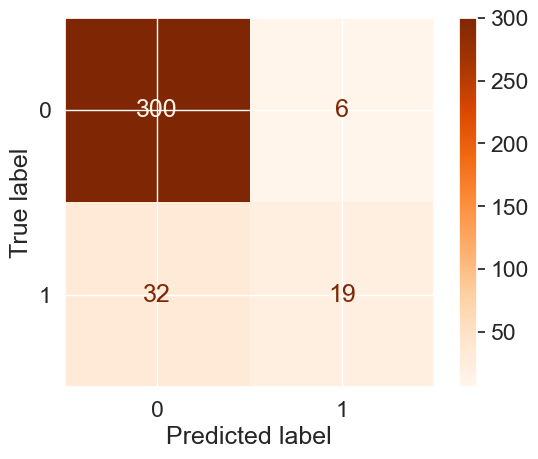

In [244]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

What are your thoughts on the performance of the model? Write your conclusions below.

In [33]:
# Podemos ver que tiene una precisión de 0.9 para predecir las páginas que no son fraudulentas (0), mientras que únicamente tiene
# una precisión del 0.76 para las páginas que si lo son (1)

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [260]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [262]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       306
           1       0.91      0.63      0.74        51

    accuracy                           0.94       357
   macro avg       0.93      0.81      0.85       357
weighted avg       0.94      0.94      0.93       357



In [264]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.938375350140056
Train data accuracy:  0.9550561797752809


<Figure size 800x600 with 0 Axes>

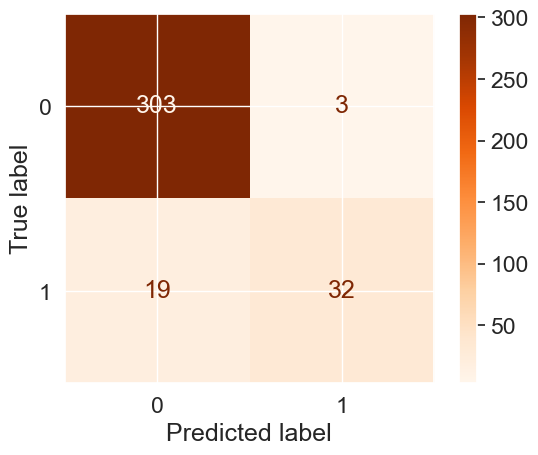

In [266]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [270]:
model = KNeighborsClassifier(n_neighbors=5)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       306
           1       0.89      0.61      0.72        51

    accuracy                           0.93       357
   macro avg       0.91      0.80      0.84       357
weighted avg       0.93      0.93      0.93       357



In [272]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9327731092436975
Train data accuracy:  0.9459269662921348


<Figure size 800x600 with 0 Axes>

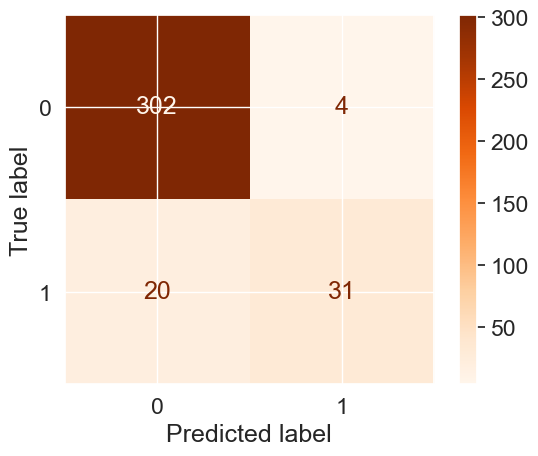

In [274]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
# Train-data accuracy con k=3: 0.95
# Train-data accuracy con k=5: 0.94
# La confusión matrix empeora un poco al incrementar la k a 5
# La accuracy score también empeora un poco al incrementar esta misma k

In [ ]:
# La confusion matrix muestra que hay muchos true negatives bien predichos, mientras que hay pocos true positives bien predichos. 
# Esto se debe a que hay mucho inbalance en los datos con los que hemos alimentado el modelo.
# Como se puede ver, tenemos 1565 datos negativos (0), mientras que sólo tenemos 216 datos positivos (1)
# Más adelante veremos técnicas para contrarrestar este inbalance.

In [288]:
df.type.value_counts()

type
0    1565
1     216
Name: count, dtype: int64

In [322]:
len(y)

1781

In [324]:
len(X)

1781

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [290]:
from sklearn.preprocessing import RobustScaler

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [294]:
scaler = RobustScaler()

In [296]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [298]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [302]:
predictions = model.predict(X_test_scaled)

In [306]:
print(f'20% for test prediction data: {len(predictions)}.')

20% for test prediction data: 357.


In [308]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       306
           1       0.93      0.51      0.66        51

    accuracy                           0.92       357
   macro avg       0.93      0.75      0.81       357
weighted avg       0.92      0.92      0.91       357



In [316]:
print("Test data accuracy: ",model.score(X_test_scaled,y_test))
print("Train data accuracy: ", model.score(X_train_scaled, y_train))

Test data accuracy:  0.9243697478991597
Train data accuracy:  0.9396067415730337


<Figure size 800x600 with 0 Axes>

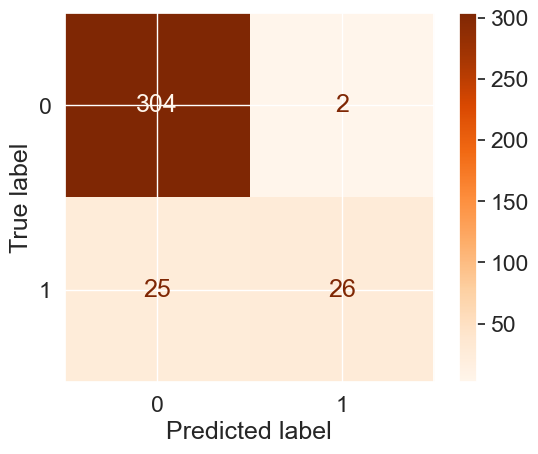

In [320]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()